In [4]:
import rasterio
import pandas as pd
import glob
from nso_ds_classes.nso_ds_models import cluster_scaler_BNDVIH_model
from nso_ds_classes.nso_ds_normalize_scaler import scaler_class_all
import pickle

This notebook is used to turn the annotations into a dataframe which contains the RGBI NDVI and Height for the annotation.

In order to test different models against these ground truths.

# Load pixel information per annotation

In [2]:
annotations = pd.read_csv("./score_model/annotations/annotations_coepelduynen_all_images.csv")

In [3]:
annotations

,coordinates,label
0,"88701.76,471428.85",Zand
1,"88721.52,470912.30",Zand
2,"88864.75,470850.32",Struweel
3,"88518.12,470826.00",Zand
4,"89275.201,471856.199",Pad
5,"88364.58,470599.96",Water
6,"87707.516,469920.189",Zand
7,"89081.779,471956.212",Struweel
8,"89260.326,471769.772",Laag gras
9,"89615.725,472113.130",Bos


In [88]:
df = pd.DataFrame([],columns=["r","g","b","i","ndvi","height","label","date","x_rd","y_rd"])

In [89]:
def __get_season_for_month(month):
    """
        This method get the season for a specific month for a number of a month.

        @param month: A month in number
        @return the season in string format, and the season in string format.
    """
    
    season = int(month)%12 // 3 + 1
    season_str = ""
    if season == 1:
        season_str = "Winter"
    if season == 2:
        season_str = "Spring"
    if season == 3:
        season_str = "Summer"
    if season == 4 :
        season_str = "Fall"
    #return season_str, season
    return season_str

In [90]:
for file in glob.glob("E:/data/coepelduynen/*ndvi_height.tif"):
        file = file.replace("\\","/")
        print(file)
        inds = rasterio.open(file, 'r') 
        meta = inds.meta
        tile = inds.read()
        for ix,row in annotations.iterrows():

                cor_index_1, cor_index_2 = float(row['coordinates'].split(",")[0]), float(row['coordinates'].split(",")[1])

                print(cor_index_1, cor_index_2)
                print(row['label'])
                index1 = inds.index(cor_index_1, cor_index_2)[0]
                index2 = inds.index(cor_index_1, cor_index_2)[1]

                cor = [ band[index1][index2] for band in tile]
                #model.get_label[model.predict(cor)]
                df = df.append({"r":cor[0],"g":cor[1],"b":cor[2],"i":cor[3],"ndvi":cor[4],"height":cor[5],"label":row['label'],"date":file.split("/")[-1].split("_")[0]+" "+file.split("/")[-1].split("_")[1],'rd_x':cor_index_1,'rd_y':cor_index_2 }, ignore_index=True)
                print(cor)

        inds.close()


E:/data/coepelduynen/20190302_105726_SV1-01_50cm_RD_11bit_RGBI_Warmond_natura2000_coepelduynen_cropped_ndvi_height.tif
88701.76 471428.85
Zand
[561, 596, 608, 766, 115, 1]
88721.52 470912.3
Zand
[612, 683, 737, 964, 122, 1]
88864.75 470850.32
Struweel
[526, 494, 417, 593, 105, 159]
88518.12 470826.0
Zand
[629, 712, 788, 1065, 125, 1]
89275.201 471856.199
Pad
[422, 352, 249, 263, 76, 1]
88364.58 470599.96
Water
[574, 576, 515, 652, 106, 0]
87707.516 469920.189
Zand
[486, 475, 408, 472, 98, 1]
89081.779 471956.212
Struweel
[441, 383, 276, 328, 85, 90]
89260.326 471769.772
Laag gras
[511, 474, 382, 434, 91, 1]
89615.725 472113.13
Bos
[419, 361, 255, 297, 82, 201]
88684.439 471686.159
Struweel
[450, 409, 317, 438, 98, 103]
88708.069 471654.917
Hoog Gras
[458, 424, 357, 532, 107, 37]
88616.1083 471659.1439
Hoog Gras
[458, 419, 332, 411, 94, 43]
88617.362 471648.302
Laag gras
[443, 400, 308, 371, 91, 1]
88342.79 470571.44
Water
[586, 591, 523, 641, 104, 0]
88817.611 470869.189
Laag gras
[520

In [93]:
df = df.drop(["x_rd",'y_rd'],axis=1)

In [95]:
df['season'] = df['date'].str[4:6].apply(__get_season_for_month)

In [98]:
df[df['rd_x'] == 88701.760]

,r,g,b,i,ndvi,height,label,date,rd_x,rd_y,season
0,561,596,608,766,115,1,Zand,20190302 105726,88701.76,471428.85,Spring
24,595,632,634,800,114,1,Zand,20190302 105829,88701.76,471428.85,Spring
48,521,545,529,654,111,1,Zand,20190308 111644,88701.76,471428.85,Spring
72,550,623,687,899,124,1,Zand,20190422 111335,88701.76,471428.85,Spring
96,793,870,776,956,109,1,Zand,20190601 105844,88701.76,471428.85,Summer
120,225,221,262,268,108,1,Zand,20191130 110721,88701.76,471428.85,Fall
144,279,224,180,135,65,1,Zand,20191202 110525,88701.76,471428.85,Winter
168,492,538,435,573,107,1,Zand,20200304 114601,88701.76,471428.85,Spring
192,640,674,674,902,116,1,Zand,20200323 112115,88701.76,471428.85,Spring
216,589,716,601,823,116,1,Zand,20200326 114323,88701.76,471428.85,Spring


In [97]:
df.to_csv("results_coordinates_annotations_all_files.csv")

In [72]:
df[df['season'] == 'Winter'].groupby("label").mean()

,r,g,b,i,ndvi,height
label,,,,,,
Bos,210.000000,151.666667,133.666667,171.666667,89.000000,202.333333
Hoog Gras,230.777778,175.444444,157.333333,198.333333,86.444444,28.000000
Laag gras,236.733333,184.466667,159.266667,206.266667,89.933333,27.000000
Pad,237.500000,176.500000,148.500000,157.666667,76.666667,3.333333
Struweel,218.277778,160.944444,141.277778,193.833333,90.833333,115.833333
Water,212.166667,148.000000,124.500000,128.500000,74.000000,0.000000
Zand,305.600000,283.066667,277.933333,348.333333,101.733333,1.000000


In [73]:
df[df['season'] == 'Winter']

,r,g,b,i,ndvi,height,label,date,season
144,279,224,180,135,65,1,Zand,20191202 110525,Winter
145,314,285,251,246,87,1,Zand,20191202 110525,Winter
146,250,204,161,294,108,159,Struweel,20191202 110525,Winter
147,323,294,255,241,85,1,Zand,20191202 110525,Winter
148,272,211,150,178,79,1,Pad,20191202 110525,Winter
...,...,...,...,...,...,...,...,...,...
499,279,244,224,330,108,102,Struweel,20211226 103526,Winter
500,246,205,178,208,91,1,Laag gras,20211226 103526,Winter
501,231,187,160,157,80,3,Laag gras,20211226 103526,Winter
502,239,194,169,178,85,55,Struweel,20211226 103526,Winter


In [42]:
df.groupby("label").median()

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,r,g,b,i,ndvi,height
label,,,,,,
Bos,340.5,287.5,206.0,586.0,75.0,203.0
Hoog Gras,398.0,381.0,307.0,612.0,70.0,39.0
Laag gras,386.5,356.0,260.5,671.5,74.0,3.0
Pad,461.0,469.5,401.0,582.5,73.0,1.0
Struweel,362.0,314.5,229.0,555.0,83.5,104.0
Water,368.5,321.5,228.0,515.0,81.0,0.0
Zand,580.5,636.5,636.5,857.5,54.0,1.0


In [74]:
df

,r,g,b,i,ndvi,height,label,date,season
0,561,596,608,766,115,1,Zand,20190302 105726,Spring
1,612,683,737,964,122,1,Zand,20190302 105726,Spring
2,526,494,417,593,105,159,Struweel,20190302 105726,Spring
3,629,712,788,1065,125,1,Zand,20190302 105726,Spring
4,422,352,249,263,76,1,Pad,20190302 105726,Spring
...,...,...,...,...,...,...,...,...,...
619,2750,2036,2056,1304,64,102,Struweel,20220816 111150,Summer
620,2726,2019,2071,1213,61,1,Laag gras,20220816 111150,Summer
621,2698,1988,2006,1256,63,3,Laag gras,20220816 111150,Summer
622,2906,2169,2199,1356,63,55,Struweel,20220816 111150,Summer


In [75]:
df_winter = df[df['season'] == "Winter"]

In [77]:
df_winter[df_winter['label'] == 'Struweel']

,r,g,b,i,ndvi,height,label,date,season
146,250,204,161,294,108,159,Struweel,20191202 110525,Winter
151,225,150,102,116,68,90,Struweel,20191202 110525,Winter
154,214,116,67,86,57,101,Struweel,20191202 110525,Winter
160,232,177,142,334,118,162,Struweel,20191202 110525,Winter
163,244,179,137,179,84,110,Struweel,20191202 110525,Winter
166,200,111,68,104,68,55,Struweel,20191202 110525,Winter
338,185,124,141,183,99,173,Struweel,20201231 105943,Winter
343,184,114,116,163,93,87,Struweel,20201231 105943,Winter
346,161,109,110,149,96,106,Struweel,20201231 105943,Winter
352,183,124,132,182,99,181,Struweel,20201231 105943,Winter


# Train a model to score with the annotation data.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("./results_coordinates_annotations_all_files.csv")
df

,Unnamed: 0,r,g,b,i,ndvi,height,label,date,rd_x,rd_y,season
0,0,561,596,608,766,115,1,Zand,20190302 105726,88701.760,471428.850,Spring
1,1,612,683,737,964,122,1,Zand,20190302 105726,88721.520,470912.300,Spring
2,2,526,494,417,593,105,159,Struweel,20190302 105726,88864.750,470850.320,Spring
3,3,629,712,788,1065,125,1,Zand,20190302 105726,88518.120,470826.000,Spring
4,4,422,352,249,263,76,1,Pad,20190302 105726,89275.201,471856.199,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
619,619,2750,2036,2056,1304,64,102,Struweel,20220816 111150,88324.650,470609.610,Summer
620,620,2726,2019,2071,1213,61,1,Laag gras,20220816 111150,87953.400,469948.070,Summer
621,621,2698,1988,2006,1256,63,3,Laag gras,20220816 111150,87827.018,469945.491,Summer
622,622,2906,2169,2199,1356,63,55,Struweel,20220816 111150,88517.910,471367.650,Summer


In [6]:
df= df.drop(['Unnamed: 0'],axis=1)

In [7]:
df.sample(400)

,r,g,b,i,ndvi,height,label,date,rd_x,rd_y,season
424,535,497,286,920,126,181,Struweel,20210709 103835,88875.561,470853.920,Summer
56,396,354,272,413,102,1,Laag gras,20190308 111644,89260.326,471769.772,Spring
508,524,481,368,552,102,8,Pad,20220302 112108,89275.201,471856.199,Spring
121,236,246,304,341,118,1,Zand,20191130 110721,88721.520,470912.300,Fall
456,572,621,553,688,109,1,Zand,20210907 112017,88701.760,471428.850,Fall
...,...,...,...,...,...,...,...,...,...,...,...
307,342,284,181,699,134,102,Struweel,20200731 112003,88324.650,470609.610,Summer
412,676,691,537,1038,121,8,Pad,20210709 103835,89275.201,471856.199,Summer
428,588,580,369,1037,127,1,Laag gras,20210709 103835,87953.400,469948.070,Summer
195,656,671,667,977,119,1,Zand,20200323 112115,88518.120,470826.000,Spring


In [50]:
model = RandomForestClassifier()

In [53]:
df_sample = df.sample(400)

In [54]:
model = model.fit(df_sample[['r','g','b','i','ndvi','height']].values,df_sample['label'].values)

In [55]:
model.score(df[['r','g','b','i','ndvi','height']].values[180:362],df['label'].values[180:362])

0.9505494505494505

In [56]:
confusion_matrix = metrics.confusion_matrix(df['label'].values[180:362],model.predict(df[['r','g','b','i','ndvi','height']].values[180:362]))

NameError: name 'metrics' is not defined

In [55]:
df['label'].iloc[180:362].value_counts()

Zand         52
Struweel     39
Hoog Gras    26
Laag gras    26
Pad          13
Water        13
Bos          13
Name: label, dtype: int64

In [61]:
model.feature_importances_

array([0.10827443, 0.11324164, 0.16114214, 0.09177196, 0.09999446,
       0.42557536])

In [62]:
df_sample[['r','g','b','i','ndvi','height']]

,r,g,b,i,ndvi,height
73,553,637,716,957,126,1
127,114,89,119,173,120,90
620,2726,2019,2071,1213,61,1
203,320,261,220,423,113,8
511,466,408,303,416,94,87
...,...,...,...,...,...,...
224,325,303,212,487,119,1
347,218,170,190,239,104,8
370,285,216,156,240,91,106
234,585,720,613,857,118,1


In [23]:
filename = './models/randomforest_classifier_coepelduynen_2019_2022.sav'
pickle.dump(model, open(filename, 'wb'))

# Load a trained model and run metrics

In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [11]:
filename ="./models/randomforest_classifier_coepelduynen_2019_2022.sav"
model = pickle.load(open(filename, 'rb'))

In [58]:
model.score(df[['r','g','b','i','ndvi','height']].values[180:362],df['label'].values[180:362])

0.9505494505494505

In [59]:
confusion_matrix = metrics.confusion_matrix(df['label'].values,model.predict(df[['r','g','b','i','ndvi','height']].values))

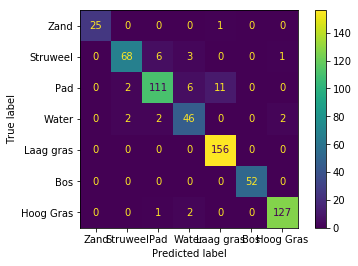

In [60]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = df['label'].unique())

cm_display.plot()
plt.show()

In [28]:
model.score(df[['r','g','b','i','ndvi','height']].values,df['label'].values)

1.0

# Load scaled model

In [8]:
cluster_centers_file = "./cluster_centers/normalized_5_BHNDVI_cluster_centers_dunes.csv"

In [9]:
a_cluster_annotations_stats_model = cluster_scaler_BNDVIH_model(cluster_centers_file)

In [61]:
a_cluster_annotations_stats_model.get_class_label(a_cluster_annotations_stats_model.predict([df[['r','g','b','i','ndvi','height']].values[0]]))

'Bos'

## Prep dataframe for scaled model

In [21]:
df_scaled = df.copy()

In [22]:
for date in df_scaled['date'].unique():
    print(date)
    

    ahn_type = ""

    if int(date[0:4]) <= 2019:
        ahn_type = "./scalers/ahn3.save"
    elif int(date[0:4]) > 2019:
        ahn_type = "./scalers/ahn4.save"

    a_normalize_scaler_class_BNDVIH = scaler_class_BNDVIH( glob.glob("./scalers/"+date.split(" ")[0]+"*band3*")[0].replace("\\","/"), \
                                                                            scaler_file_band5 = glob.glob("./scalers/"+date.split(" ")[0]+"*band5*")[0].replace("\\","/"), \
                                                                            scaler_file_band6 = ahn_type)
    
    df_scaled[df_scaled['date'] == date] = a_normalize_scaler_class_BNDVIH.transform(df_scaled[df_scaled['date'] == date], col_names=["b",'ndvi','height'])

20190302 105726
20190302 105829
20190308 111644
20190422 111335
20190601 105844
20191130 110721
20191202 110525
20200304 114601
20200323 112115
20200326 114323
20200508 110812
20200625 112015
20200731 112003
20200915 112329
20201231 105943
20210302 111247
20210423 104948
20210709 103835
20210815 111051
20210907 112017
20211226 103526
20220302 112108
20220501 111418
20220514 114854
20220515 113347
20220816 111150


In [30]:
df_scaled.to_csv("results_coordinates_annotations_all_files_scaled.csv")

In [28]:
df_scaled[df_scaled['season'] == 'Winter'].groupby("label").mean()

,r,g,b,i,ndvi,height,rd_x,rd_y
label,,,,,,,,
Bos,210.000000,151.666667,0.117182,171.666667,0.546596,0.793464,89615.725000,472113.130000
Hoog Gras,230.777778,175.444444,0.176466,198.333333,0.542330,0.109804,88597.716100,471575.194967
Laag gras,236.733333,184.466667,0.141891,206.266667,0.554675,0.105882,88495.143400,470836.164800
Pad,237.500000,176.500000,0.155085,157.666667,0.477204,0.013072,89020.915000,471798.362500
Struweel,218.277778,160.944444,0.131639,193.833333,0.560053,0.454248,88724.848167,471220.645167
Water,212.166667,148.000000,0.109129,128.500000,0.460148,0.000000,88353.685000,470585.700000
Zand,305.600000,283.066667,0.310964,348.333333,0.631063,0.003922,88478.123200,470753.923800


In [29]:
df_scaled[df_scaled['season'] == 'Summer'].groupby("label").mean()

,r,g,b,i,ndvi,height,rd_x,rd_y
label,,,,,,,,
Bos,832.166667,661.666667,0.194843,1122.166667,0.888929,0.794771,89615.725000,472113.130000
Hoog Gras,893.333333,749.888889,0.264214,956.555556,0.734838,0.114597,88597.716100,471575.194967
Laag gras,840.366667,691.800000,0.202650,1058.866667,0.809871,0.097516,88495.143400,470836.164800
Pad,956.000000,821.166667,0.325157,886.250000,0.670707,0.015359,89020.915000,471798.362500
Struweel,832.111111,667.638889,0.189874,1029.916667,0.824051,0.456318,88724.848167,471220.645167
Water,829.000000,675.000000,0.184363,843.500000,0.747925,0.000000,88353.685000,470585.700000
Zand,1073.200000,1007.433333,0.467713,1018.066667,0.669658,0.003922,88478.123200,470753.923800
